# Highlighting the Buffers for Hyporheic Flux Averaging

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data, first column is the date
summer_HF = pd.read_csv('summer_HF.csv', parse_dates=[0], index_col=0)
spring_HF = pd.read_csv('spring_HF.csv', parse_dates=[0], index_col=0)
water_depth = pd.read_csv('water_depth.csv', parse_dates=[0], index_col=0)

# merge water depth into the HF data by date
summer_HF = summer_HF.merge(water_depth, left_index=True, right_index=True)
spring_HF = spring_HF.merge(water_depth, left_index=True, right_index=True)

Summer

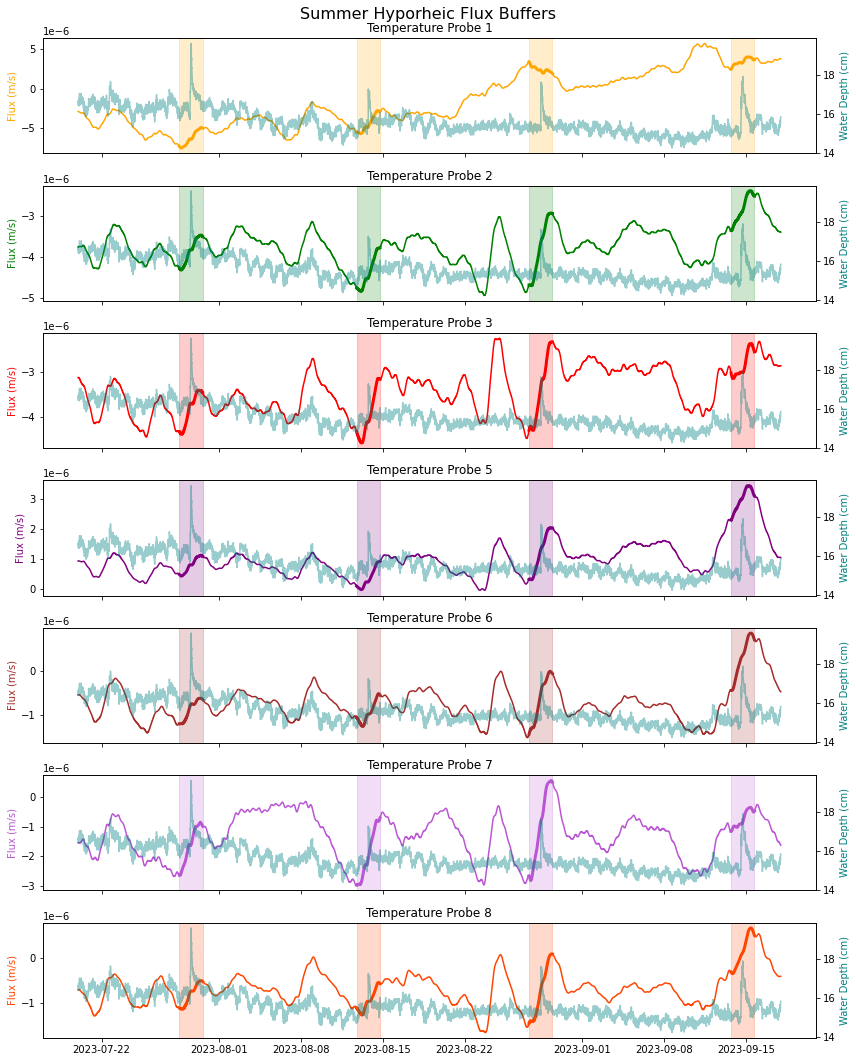

In [31]:
# convert index to datetime if not already
summer_HF.index = pd.to_datetime(summer_HF.index)
# keep all data after 7/15/2023
summer_HF = summer_HF[summer_HF.index >= '2023-07-20']

# define the date ranges to highlight
highlight_ranges = [
    ('2023-07-28 15:30', '2023-07-30 15:30'),
    ('2023-08-12 18:45', '2023-08-14 18:45'),
    ('2023-08-27 12:00', '2023-08-29 12:00'),
    ('2023-09-13 18:00', '2023-09-15 18:00')
]

# dlot time series of water depth and hyporheic flux
fig, ax = plt.subplots(7, 1, figsize=(12, 15), sharex=True)
fig.patch.set_facecolor('white')

# function to plot data and highlight ranges
def plot_and_highlight(ax, depth_col, flux_col, title, flux_color):
    ax_twin = ax.twinx()
    ax_twin.plot(summer_HF.index, summer_HF[depth_col], 'teal', label='Water Depth', alpha=0.4, zorder=1)
    ax_twin.set_ylabel('Water Depth (cm)', color='teal')
    ax.set_title(title)
    ax.plot(summer_HF.index, summer_HF[flux_col], label=f'{flux_col} Flux', color=flux_color, linestyle='-', zorder=2)
    ax.set_ylabel('Flux (m/s)', color=flux_color)
    
    # highlight the date ranges
    for start, end in highlight_ranges:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=flux_color, alpha=0.2, zorder=0)
        mask = (summer_HF.index >= pd.to_datetime(start)) & (summer_HF.index <= pd.to_datetime(end))
        #ax_twin.plot(summer_HF.index[mask], summer_HF[depth_col][mask], color='teal', linewidth=0.5, zorder=0)
        # for some reason the above line doesn't work, the layering always puts depth on top?
        ax.plot(summer_HF.index[mask], summer_HF[flux_col][mask], color=flux_color, linewidth=3, zorder=4)

# Plot each subplot
plot_and_highlight(ax[0], 'Depth', 'T1', 'Temperature Probe 1', 'orange')
plot_and_highlight(ax[1], 'Depth', 'T2', 'Temperature Probe 2', 'green')
plot_and_highlight(ax[2], 'Depth', 'T3', 'Temperature Probe 3', 'red')
plot_and_highlight(ax[3], 'Depth', 'T5', 'Temperature Probe 5', 'purple')
plot_and_highlight(ax[4], 'Depth', 'T6', 'Temperature Probe 6', 'brown')
plot_and_highlight(ax[5], 'Depth', 'T7', 'Temperature Probe 7', 'mediumorchid')
plot_and_highlight(ax[6], 'Depth', 'T8', 'Temperature Probe 8', 'orangered')

fig.suptitle('Summer Hyporheic Flux Buffers', fontsize=16)
fig.tight_layout()
plt.savefig('summer_HF_buffer_V1.png', dpi=500)
plt.show()

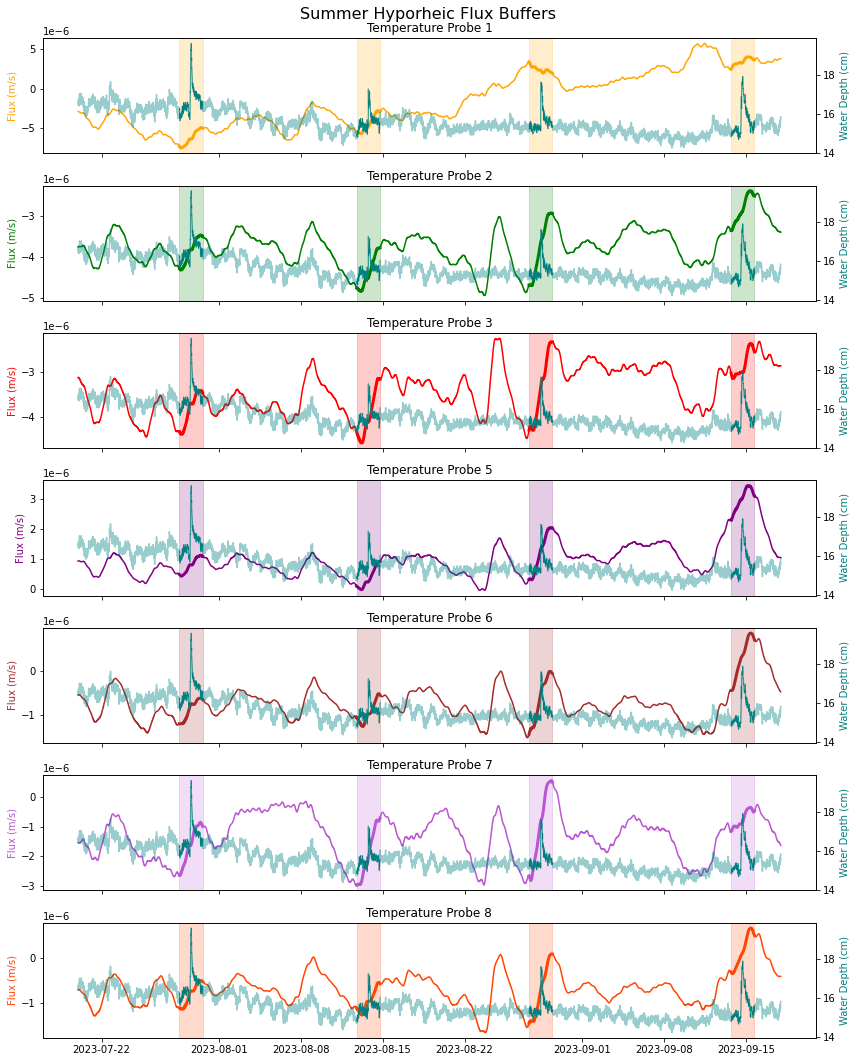

In [32]:
# define the date ranges to highlight
highlight_ranges = [
    ('2023-07-28 15:30', '2023-07-30 15:30'),
    ('2023-08-12 18:45', '2023-08-14 18:45'),
    ('2023-08-27 12:00', '2023-08-29 12:00'),
    ('2023-09-13 18:00', '2023-09-15 18:00')
]

# plot time series of water depth and hyporheic flux
fig, ax = plt.subplots(7, 1, figsize=(12, 15), sharex=True)
fig.patch.set_facecolor('white')

# function to plot data and highlight ranges
def plot_and_highlight(ax, depth_col, flux_col, title, flux_color):
    ax_twin = ax.twinx()
    ax_twin.plot(summer_HF.index, summer_HF[depth_col], 'teal', label='Water Depth', alpha=0.4, zorder=1)
    ax_twin.set_ylabel('Water Depth (cm)', color='teal')
    ax.set_title(title)
    ax.plot(summer_HF.index, summer_HF[flux_col], label=f'{flux_col} Flux', color=flux_color, linestyle='-', zorder=2)
    ax.set_ylabel('Flux (m/s)', color=flux_color)
    
    # highlight the date ranges
    for start, end in highlight_ranges:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=flux_color, alpha=0.2, zorder=0)
    
    # Plot water depth mask first
    for start, end in highlight_ranges:
        mask = (summer_HF.index >= pd.to_datetime(start)) & (summer_HF.index <= pd.to_datetime(end))
        ax_twin.plot(summer_HF.index[mask], summer_HF[depth_col][mask], color='teal', linewidth=0.5, zorder=3)
    
    # Plot hyporheic flux mask last
    for start, end in highlight_ranges:
        mask = (summer_HF.index >= pd.to_datetime(start)) & (summer_HF.index <= pd.to_datetime(end))
        ax.plot(summer_HF.index[mask], summer_HF[flux_col][mask], color=flux_color, linewidth=3, zorder=4)

# Plot each subplot
plot_and_highlight(ax[0], 'Depth', 'T1', 'Temperature Probe 1', 'orange')
plot_and_highlight(ax[1], 'Depth', 'T2', 'Temperature Probe 2', 'green')
plot_and_highlight(ax[2], 'Depth', 'T3', 'Temperature Probe 3', 'red')
plot_and_highlight(ax[3], 'Depth', 'T5', 'Temperature Probe 5', 'purple')
plot_and_highlight(ax[4], 'Depth', 'T6', 'Temperature Probe 6', 'brown')
plot_and_highlight(ax[5], 'Depth', 'T7', 'Temperature Probe 7', 'mediumorchid')
plot_and_highlight(ax[6], 'Depth', 'T8', 'Temperature Probe 8', 'orangered')

fig.suptitle('Summer Hyporheic Flux Buffers', fontsize=16)
fig.tight_layout()
plt.savefig('summer_HF_buffer_V2.png', dpi=500)
plt.show()


Spring

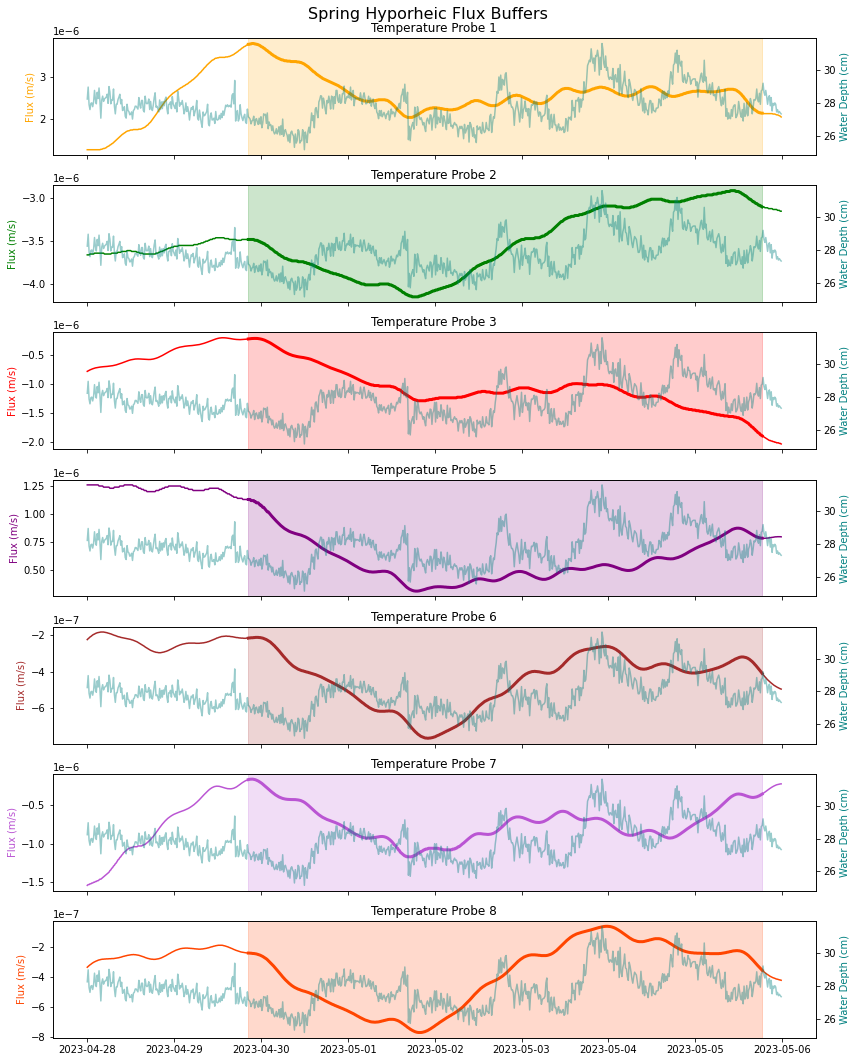

In [34]:
# convert index to datetime if not already
spring_HF.index = pd.to_datetime(spring_HF.index)

# define the date ranges to highlight
highlight_ranges = [('2023-04-29 20:30', '2023-05-05 18:30')]

# dlot time series of water depth and hyporheic flux
fig, ax = plt.subplots(7, 1, figsize=(12, 15), sharex=True)
fig.patch.set_facecolor('white')

# function to plot data and highlight ranges
def plot_and_highlight(ax, depth_col, flux_col, title, flux_color):
    ax_twin = ax.twinx()
    ax_twin.plot(spring_HF.index, spring_HF[depth_col], 'teal', label='Water Depth', alpha=0.4, zorder=1)
    ax_twin.set_ylabel('Water Depth (cm)', color='teal')
    ax.set_title(title)
    ax.plot(spring_HF.index, spring_HF[flux_col], label=f'{flux_col} Flux', color=flux_color, linestyle='-', zorder=2)
    ax.set_ylabel('Flux (m/s)', color=flux_color)
    
    # highlight the date ranges
    for start, end in highlight_ranges:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=flux_color, alpha=0.2, zorder=0)
        mask = (spring_HF.index >= pd.to_datetime(start)) & (spring_HF.index <= pd.to_datetime(end))
        #ax_twin.plot(summer_HF.index[mask], summer_HF[depth_col][mask], color='teal', linewidth=0.5, zorder=0)
        # for some reason the above line doesn't work, the layering always puts depth on top?
        ax.plot(spring_HF.index[mask], spring_HF[flux_col][mask], color=flux_color, linewidth=3, zorder=4)

# Plot each subplot
plot_and_highlight(ax[0], 'Depth', 'T1', 'Temperature Probe 1', 'orange')
plot_and_highlight(ax[1], 'Depth', 'T2', 'Temperature Probe 2', 'green')
plot_and_highlight(ax[2], 'Depth', 'T3', 'Temperature Probe 3', 'red')
plot_and_highlight(ax[3], 'Depth', 'T5', 'Temperature Probe 5', 'purple')
plot_and_highlight(ax[4], 'Depth', 'T6', 'Temperature Probe 6', 'brown')
plot_and_highlight(ax[5], 'Depth', 'T7', 'Temperature Probe 7', 'mediumorchid')
plot_and_highlight(ax[6], 'Depth', 'T8', 'Temperature Probe 8', 'orangered')

fig.suptitle('Spring Hyporheic Flux Buffers', fontsize=16)
fig.tight_layout()
plt.savefig('spring_HF_buffer_V1.png', dpi=500)
plt.show()

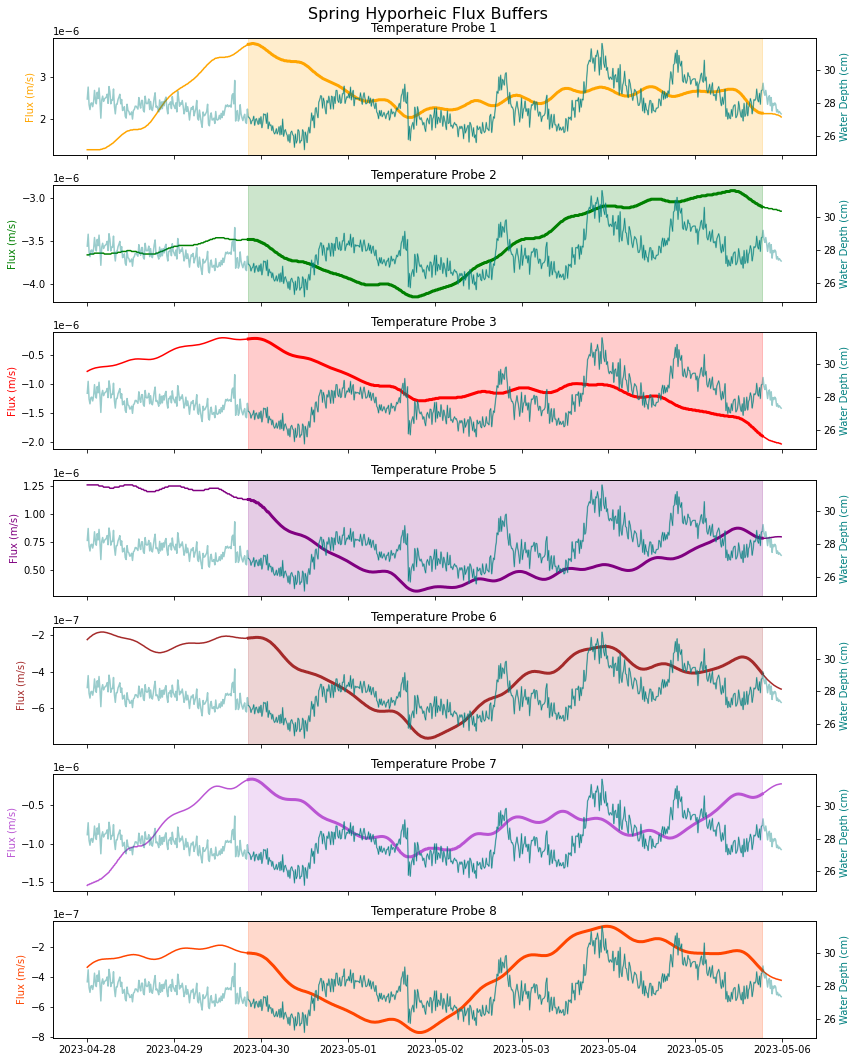

In [35]:
# convert index to datetime if not already
spring_HF.index = pd.to_datetime(spring_HF.index)

# define the date ranges to highlight
highlight_ranges = [('2023-04-29 20:30', '2023-05-05 18:30')]

# dlot time series of water depth and hyporheic flux
fig, ax = plt.subplots(7, 1, figsize=(12, 15), sharex=True)
fig.patch.set_facecolor('white')

# function to plot data and highlight ranges
def plot_and_highlight(ax, depth_col, flux_col, title, flux_color):
    ax_twin = ax.twinx()
    ax_twin.plot(spring_HF.index, spring_HF[depth_col], 'teal', label='Water Depth', alpha=0.4, zorder=1)
    ax_twin.set_ylabel('Water Depth (cm)', color='teal')
    ax.set_title(title)
    ax.plot(spring_HF.index, spring_HF[flux_col], label=f'{flux_col} Flux', color=flux_color, linestyle='-', zorder=2)
    ax.set_ylabel('Flux (m/s)', color=flux_color)
    
    # highlight the date ranges
    for start, end in highlight_ranges:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=flux_color, alpha=0.2, zorder=0)
    
    # Plot water depth mask first
    for start, end in highlight_ranges:
        mask = (spring_HF.index >= pd.to_datetime(start)) & (spring_HF.index <= pd.to_datetime(end))
        ax_twin.plot(spring_HF.index[mask], spring_HF[depth_col][mask], color='teal', linewidth=0.5, zorder=3)
    
    # Plot hyporheic flux mask last
    for start, end in highlight_ranges:
        mask = (spring_HF.index >= pd.to_datetime(start)) & (spring_HF.index <= pd.to_datetime(end))
        ax.plot(spring_HF.index[mask], spring_HF[flux_col][mask], color=flux_color, linewidth=3, zorder=4)

# Plot each subplot
plot_and_highlight(ax[0], 'Depth', 'T1', 'Temperature Probe 1', 'orange')
plot_and_highlight(ax[1], 'Depth', 'T2', 'Temperature Probe 2', 'green')
plot_and_highlight(ax[2], 'Depth', 'T3', 'Temperature Probe 3', 'red')
plot_and_highlight(ax[3], 'Depth', 'T5', 'Temperature Probe 5', 'purple')
plot_and_highlight(ax[4], 'Depth', 'T6', 'Temperature Probe 6', 'brown')
plot_and_highlight(ax[5], 'Depth', 'T7', 'Temperature Probe 7', 'mediumorchid')
plot_and_highlight(ax[6], 'Depth', 'T8', 'Temperature Probe 8', 'orangered')

fig.suptitle('Spring Hyporheic Flux Buffers', fontsize=16)
fig.tight_layout()
plt.savefig('spring_HF_buffer_V2.png', dpi=500)
plt.show()